In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os

from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_auc_score
from scipy.stats import pearsonr
from scipy import stats
from tqdm import tqdm

In [ ]:
os.chdir(r'/content/drive/MyDrive/Link Prediction - 1k -  fair')

In [ ]:
df_folder = r"dataframes/"
path_pickle_all_measures = os.path.join(df_folder, "df_TEST_2000_2016_ALL_MEASURES.pkl")
df_TEST_2000_2016_MEASURES_999 = pd.read_pickle(path_pickle_all_measures)

In [ ]:
df_TEST_2000_2016_MEASURES_999.head()

,edges,year,y,PA,WPA,CN,WCN,AA,WAA,RA,WRA,JC,WJC,ANN,LR,SVC,XGBOOST
0,"(2143146826, 2564007945)",2001,1,450,9815,2,27,0.397582,3.607638,0.013072,0.015173,0.037736,0.125000,0.182378,0.477284,0.226772,0.112445
1,"(2279601013, 2026855265)",2001,1,1617,9360,12,52,2.527674,7.905581,0.109612,0.085980,0.171429,0.263959,0.679498,0.497381,0.895412,0.635889
2,"(2164815468, 2104799500)",2001,1,2044,19292,3,12,0.554536,1.612136,0.013513,0.007125,0.030612,0.039604,0.102159,0.476176,0.191999,0.042789
3,"(2077484404, 2469167886)",2001,1,2550,29808,21,207,4.521172,31.544239,0.219645,0.357763,0.262500,0.589744,0.964608,0.523929,0.999994,0.960202
4,"(2235923408, 2064625021)",2001,1,95,505,3,7,0.671738,1.068488,0.036804,0.014509,0.142857,0.066038,0.241534,0.481596,0.382247,0.316618


In [ ]:
measure_list = ["PA", "WPA", "CN", "WCN", "AA", "WAA", "RA", "WRA", "JC", "WJC", "ANN", "LR", "SVC", "XGBOOST"]

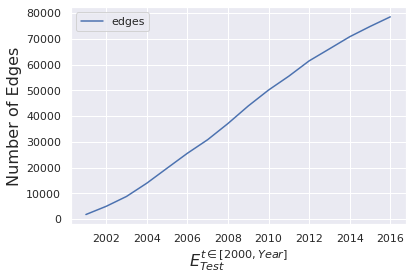

In [ ]:
sns.set(style="darkgrid")
df_TEST_2000_2016_MEASURES_999.query("year != 9999").groupby("year").count()[["edges"]].cumsum().plot()
plt.xlabel("$E_{Test}^{t \in [2000, Year]}$", fontsize = 16)
plt.ylabel("Number of Edges", fontsize = 16)
plt.show()

# Test 

In [ ]:
test_df = df_TEST_2000_2016_MEASURES_999.copy()

for measure_ in measure_list:
    test_df[measure_] = round((test_df[measure_] - test_df[measure_].min()) / (test_df[measure_].max() - test_df[measure_].min()))

# Test 2

In [ ]:
test_df2 = df_TEST_2000_2016_MEASURES_999.copy()

for measure_ in measure_list:
    test_df2[measure_] = (test_df2[measure_] - test_df2[measure_].min()) / (test_df2[measure_].max() - test_df2[measure_].min())

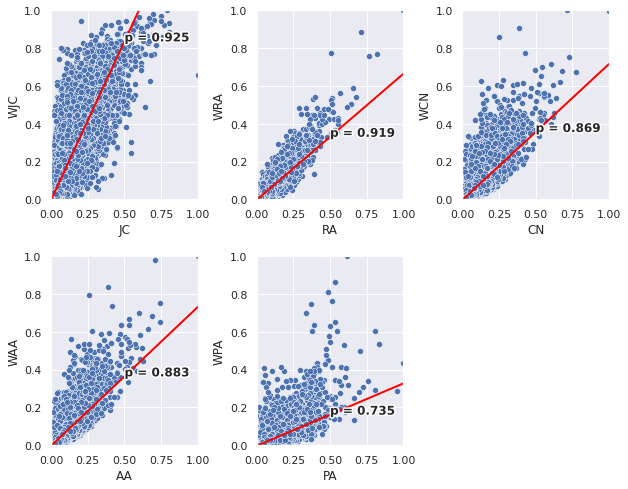

In [ ]:
import matplotlib.patheffects as path_effects
from scipy import stats


pos_dict = {0:(0, 0), 1:(0, 1), 2:(0, 2), 3:(1, 0), 4:(1, 1)}
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize = (10, 8))

plot_list = [("JC", "WJC"), ("RA", "WRA"), ("CN", "WCN"), ("AA", "WAA"), ("PA", "WPA")]
measure_x_list = []
corr_y_list = []

for i, (x, y) in enumerate(plot_list):
    g = sns.scatterplot(data=test_df2, x=x, y=y, ax = axs[pos_dict[i][0], pos_dict[i][1]], alpha = 1)
    t_value,p_value = stats.ttest_ind(test_df2[x], test_df2[y])

    pcorr, _ = pearsonr(test_df2[x], test_df2[y])
    coeffs = np.polyfit(test_df2[x], test_df2[y],1)
    X = np.linspace(0, 1, len(test_df2[x]))
    y_fit = X * coeffs[0] + coeffs[1]
    g.plot(X, y_fit, color = 'red', linestyle='-', linewidth=2)

    text_p = "p = %.3f"%pcorr 

    measure_x_list.append(x)
    corr_y_list.append(pcorr)

    text = g.text(0.5, 0.5 * coeffs[0] + coeffs[1], text_p, fontweight = 'bold')#, path_effects=[path_effects.withSimplePatchShadow()])
    text.set_path_effects([path_effects.Stroke(linewidth = 3, foreground = 'white'), path_effects.Normal()])

    g.set_xlim(0, 1)
    g.set_ylim(0, 1)

fig.delaxes(axs[1, 2])
plt.subplots_adjust(wspace = .4, hspace = .3)
plt.show()

In [ ]:
df_TEST_2000_2016_MEASURES_999.y = df_TEST_2000_2016_MEASURES_999.y.astype(int)#.corr()
corr_matrix = df_TEST_2000_2016_MEASURES_999.corr()

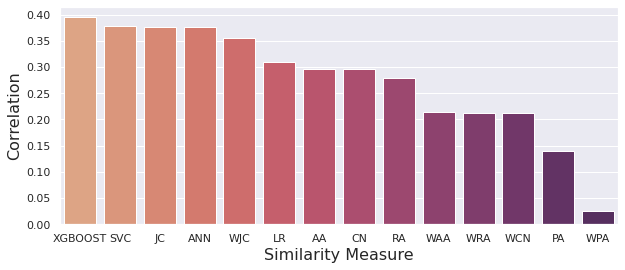

In [ ]:
sns.set(rc = {'figure.figsize':(10, 4)})

new_index_corr = corr_matrix["y"].abs().sort_values(ascending = False).index

sorted_corr = corr_matrix["y"].reindex(new_index_corr)

sorted_corr.drop("y", axis = 0, inplace = True)

sns.barplot(y = sorted_corr.values, x = sorted_corr.index, orient = "v", palette = "flare")
plt.xlabel("Similarity Measure", fontsize = 16)
plt.ylabel("Correlation", fontsize = 16)
plt.show()

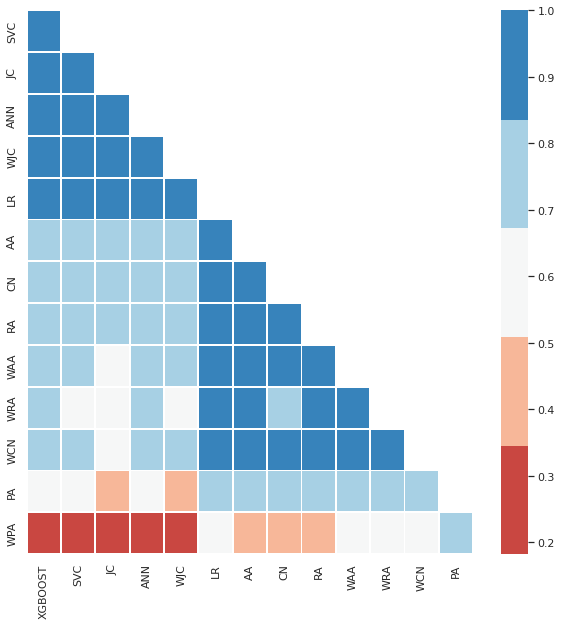

In [ ]:
sns.set(rc = {'figure.figsize': (10, 10)}, style = "white")

# idx_cp_test = ["WAA", "WCN", "AA", "CN", "WRA", "RA", "LR", "ANN", "XGBOOST", "JC", "WJC", "SVC", "PA", "WPA"]

idx_cp_test = ["XGBOOST", "SVC", "JC", "ANN", "WJC", "LR", "AA", "CN", "RA", "WAA", "WRA", "WCN", "PA", "WPA"]

# idx_cp_test = df_TEST_2000_2016_MEASURES_999.drop(["edges", "year", "y"], axis = 1).corr().mean().reset_index().sort_values(0, ascending = False)["index"].tolist()

corr_df_sim = df_TEST_2000_2016_MEASURES_999.loc[:, idx_cp_test].corr().copy()
idx_corr = ((corr_df_sim.sum() - 1) / (corr_df_sim.shape[0] - 1)).reset_index().sort_values(0, ascending = False)["index"].tolist()

n_corr = 5
cmap = sns.color_palette('RdBu', n_colors= n_corr)

# mask
mask = np.triu(np.ones_like(corr_df_sim, dtype=np.bool_))
# adjust mask and df
mask = mask[1:, :-1]

corr = corr_df_sim.iloc[1:,:-1].copy()
sns.heatmap(corr
            , mask = mask
            # , annot = True
            , vmin = corr_df_sim.min().min()
            , vmax = corr_df_sim.max().max()
            , cmap = cmap
            , linewidths = .8)
plt.show()


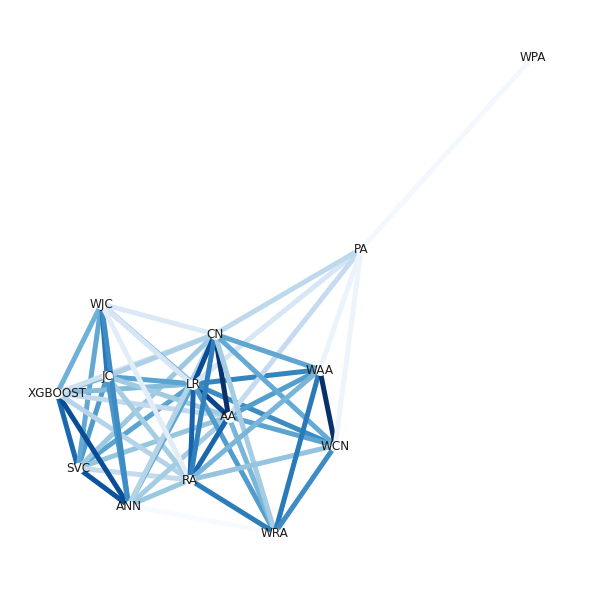

In [ ]:
graph_to_chart = corr_df_sim.reset_index().melt(id_vars = "index")
edges_df = graph_to_chart[graph_to_chart["index"] != graph_to_chart["variable"]].reset_index(drop = True)

import networkx as nx

edges_df = edges_df[edges_df["value"] > 0.72]

G = nx.from_pandas_edgelist(edges_df, "index", "variable", "value")

sns.set(rc = {'figure.figsize': (8, 8)}, style = "darkgrid")

import matplotlib.pyplot as plt
import networkx as nx
import random

edges, weights = zip(*nx.get_edge_attributes(G, 'value').items())

n_corr = 5
cmap = sns.color_palette('RdBu', n_colors= n_corr)

pos = nx.spring_layout(G, iterations = 10000, weight = "value", k = 0.05)
# pos = nx.kamada_kawai_layout(G, )
nx.draw(G, pos, node_color='white', node_size = 100, edgelist=edges, edge_color=weights, width=5, edge_cmap=plt.cm.Blues, with_labels = True)
# plt.savefig('edges.png')

In [ ]:
df_TEST_2000_2016_MEASURES_999.query("year <= 2016").shape[0]

78569

In [ ]:
measure_list = ["PA", "WPA", "CN", "WCN", "AA", "WAA", "RA", "WRA", "JC", "WJC"
                                           , "ANN", "LR", "SVC", "XGBOOST"]

AUC_df = pd.DataFrame(index = measure_list)

for year_  in range(2001, 2017):
    
    for measure_ in measure_list:

        y_true = (df_TEST_2000_2016_MEASURES_999[["year"]] <= year_).astype(int).year.tolist()

        y_pred = df_TEST_2000_2016_MEASURES_999[measure_].tolist()

        auc = roc_auc_score(y_true, y_pred)
        
        AUC_df.loc[str(measure_), str(year_)] = auc

In [ ]:
AUC_df = AUC_df.transpose()

In [ ]:
auc_order_idx = AUC_df.mean().reset_index().sort_values(0, ascending = False)["index"].tolist()

In [ ]:
AUC_df[auc_order_idx].reset_index().melt(id_vars = "index")

,index,variable,value
0,2001,ANN,0.749720
1,2002,ANN,0.744736
2,2003,ANN,0.736553
3,2004,ANN,0.731900
4,2005,ANN,0.727228
...,...,...,...
219,2012,WPA,0.542017
220,2013,WPA,0.539441
221,2014,WPA,0.538927
222,2015,WPA,0.539224


In [ ]:
AUC_df_melt = AUC_df[auc_order_idx].reset_index().melt(id_vars = "index")

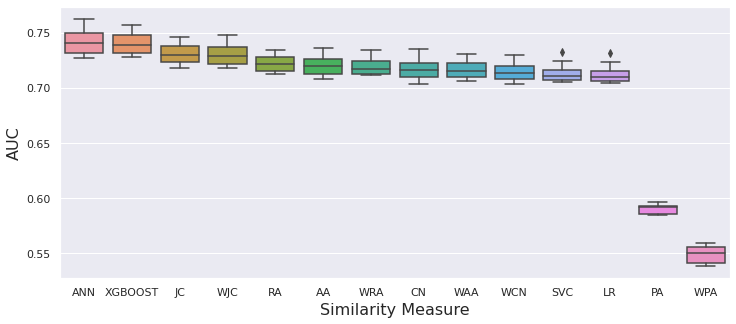

In [ ]:
sns.set(rc = {'figure.figsize':(12, 5)}, style = "darkgrid")
sns.boxplot(data = AUC_df_melt, x = "variable", y = "value")
plt.xlabel("Similarity Measure", fontsize = 16)
plt.ylabel("AUC", fontsize = 16)
plt.show()

In [ ]:
def highlight_max(s):

    is_max = s == s.max()
    return ['font-weight: bolder; color: blue' if v else '' for v in is_max]

def highlight_min(s):

    is_min = s == s.min()
    return ['font-weight: bolder; color: red' if v else '' for v in is_min]

s = AUC_df[auc_order_idx].describe().transpose().drop("count", axis = 1).style

for measure_ in s.columns.tolist():
    s = s.format({str(measure_): '{:.3f}'})
    
s = s.set_properties(**{
    'text-align': 'center'
    , 'white-space': 'pre-wrap'
    , 'border-style': 'solid'
    , 'border-width': '1px'
    , 'border-color' : 'black'
    , 'color' : 'black'
    , 'background-color' : 'white'
})
s = s.apply(highlight_max).apply(highlight_min)
# save_img(s, "AUC_description.png")
s

,mean,std,min,25%,50%,75%,max
ANN,0.741526,0.010786,0.727228,0.731832,0.740210,0.749140,0.762
XGBOOST,0.740146,0.009374,0.728101,0.731593,0.738484,0.747387,0.756
JC,0.730793,0.009159,0.717859,0.722897,0.729385,0.737854,0.746
WJC,0.729831,0.009296,0.717686,0.721474,0.728514,0.736861,0.748
RA,0.721964,0.007283,0.712638,0.715022,0.721200,0.727814,0.734
AA,0.719867,0.008495,0.707614,0.712577,0.719434,0.725776,0.736
WRA,0.719266,0.007595,0.711190,0.712222,0.717391,0.723982,0.735
CN,0.717007,0.009272,0.703711,0.709501,0.716185,0.722322,0.735
WAA,0.716403,0.007916,0.705824,0.709471,0.714839,0.722099,0.731
WCN,0.714868,0.008090,0.703762,0.707810,0.713202,0.719884,0.730


In [ ]:

AUC_df_melt.pivot("variable", "index", "value").loc[auc_order_idx, :]

index,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
variable,,,,,,,,,,,,,,,,
ANN,0.749720,0.744736,0.736553,0.731900,0.727228,0.730148,0.730108,0.731631,0.733561,0.738488,0.741932,0.745970,0.748947,0.753140,0.757970,0.762388
XGBOOST,0.753703,0.747073,0.738766,0.734114,0.728101,0.730226,0.729733,0.730253,0.732039,0.736157,0.738202,0.741834,0.744707,0.748328,0.752653,0.756449
JC,0.745486,0.737616,0.728664,0.723517,0.717859,0.721223,0.720958,0.722102,0.723163,0.727337,0.730105,0.733007,0.735138,0.738569,0.742365,0.745575
WJC,0.747965,0.739215,0.729084,0.723245,0.717686,0.720492,0.720153,0.721052,0.721614,0.725558,0.727944,0.730704,0.732953,0.736077,0.740093,0.743458
RA,0.733683,0.728618,0.722325,0.717704,0.712638,0.715093,0.713896,0.714542,0.714809,0.718314,0.720075,0.722400,0.724342,0.727546,0.731147,0.734289
AA,0.726528,0.721222,0.714814,0.711537,0.707614,0.711767,0.711495,0.712847,0.714012,0.718260,0.720608,0.723402,0.725526,0.729004,0.732941,0.736291
WRA,0.734580,0.729054,0.722086,0.716582,0.711207,0.712499,0.711190,0.711369,0.711392,0.714450,0.715915,0.718200,0.720017,0.723055,0.726762,0.729891
CN,0.721536,0.716146,0.709811,0.707037,0.703711,0.708493,0.708573,0.710233,0.711693,0.716225,0.718793,0.721774,0.723964,0.727502,0.731595,0.735022
WAA,0.727933,0.721766,0.714494,0.710213,0.705824,0.708430,0.708090,0.709054,0.709609,0.713214,0.715184,0.717761,0.719868,0.723097,0.727259,0.730660


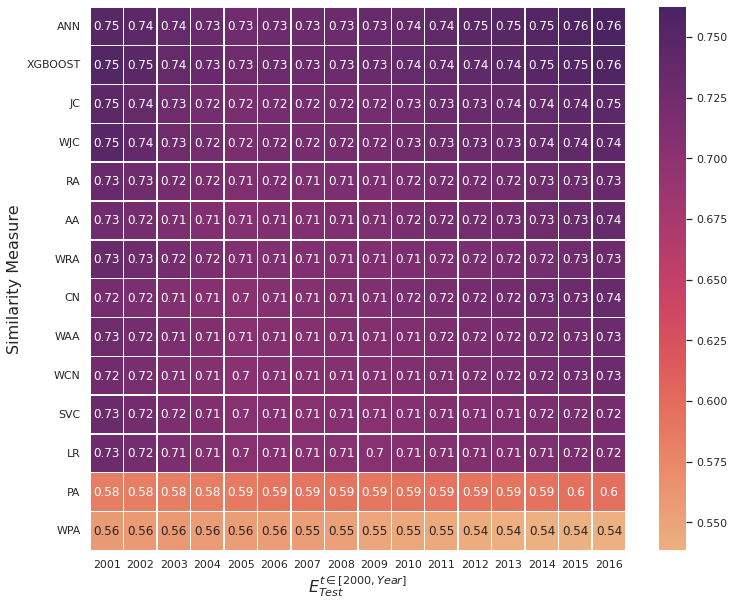

In [ ]:
sns.set(rc = {'figure.figsize':(12, 10)}, style = "white")
sns.heatmap(AUC_df_melt.pivot("variable", "index", "value").loc[auc_order_idx, :]
            , annot = True, cmap = "flare", linewidths=.5)
plt.xlabel("$E_{Test}^{t \in [2000, Year]}$", fontsize = 16)
plt.ylabel("Similarity Measure", fontsize = 16)
plt.show()

In [ ]:
AUC_df_melt = AUC_df.reset_index(drop = False).melt(id_vars = "index")

,index,variable,value
0,2001,PA,0.584231
1,2002,PA,0.584613
2,2003,PA,0.584304
3,2004,PA,0.584503
4,2005,PA,0.586157
...,...,...,...
219,2012,XGBOOST,0.741834
220,2013,XGBOOST,0.744707
221,2014,XGBOOST,0.748328
222,2015,XGBOOST,0.752653


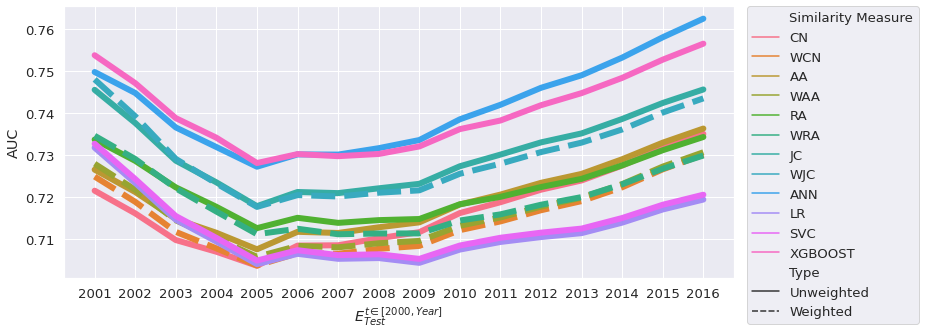

In [ ]:
sns.set(font_scale = 1.2, rc = {'figure.figsize':(12, 5)}, style="darkgrid")


pd.set_option('display.max_colwidth', 50)
pd.set_option("display.precision", 10)

cp_AUC_df_melt = AUC_df_melt[AUC_df_melt["variable"].isin(["ANN", "LR", "XGBOOST", "SVC", "JC", "WJC", "AA", "WAA", "RA", "WRA", "CN", "WCN"])].copy()
list_prec_mean = ["ANN", "LR", "XGBOOST", "SVC", "JC", "WJC", "AA", "WAA", "RA", "WRA", "CN", "WCN"]
cp_AUC_df_melt.columns = ["$E_{Test}^{t \in [2000, Year]}$", "Similarity Measure", "AUC"]

def getstyle(x):
  if "w" in x["Similarity Measure"].lower():
    return "Weighted"
  else: return "Unweighted"

cp_AUC_df_melt["Type"] = cp_AUC_df_melt.apply(lambda x :getstyle(x), axis = 1)

sns.lineplot(data = cp_AUC_df_melt, x = "$E_{Test}^{t \in [2000, Year]}$",  y = "AUC", hue = "Similarity Measure", style = "Type", linewidth = 6)

plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0 )
plt.show()

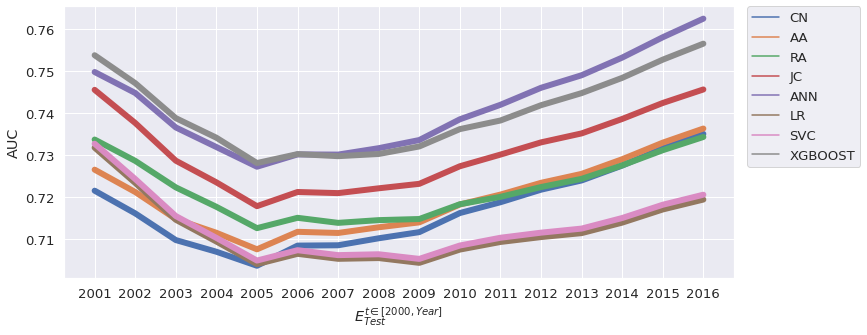

In [ ]:
sns.set(font_scale = 1.2, rc = {'figure.figsize':(12, 5)}, style="darkgrid")


pd.set_option('display.max_colwidth', 50)
pd.set_option("display.precision", 10)

cp_AUC_df_melt = AUC_df_melt[AUC_df_melt["variable"].isin(["ANN", "LR", "XGBOOST", "SVC", "JC", "AA", "RA", "CN",])].copy()
list_prec_mean = ["ANN", "LR", "XGBOOST", "SVC", "JC", "AA", "RA", "CN"]
cp_AUC_df_melt.columns = ["$E_{Test}^{t \in [2000, Year]}$", "Similarity Measure", "AUC"]

sns.lineplot(data = cp_AUC_df_melt, x = "$E_{Test}^{t \in [2000, Year]}$",  y = "AUC", hue = "Similarity Measure", linewidth = 6)

plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0 )
plt.show()

In [ ]:
import seaborn as sns

pd.set_option('display.max_colwidth', 5)
pd.set_option("display.precision", 3)

def all_white(s):

    return ['background-color: white; color : black; font-weight: bolder' for v in s]

s = AUC_df[auc_order_idx].round(decimals=3).style

for measure_ in AUC_df.columns.tolist():
    s = s.format({str(measure_): '{:.3f}'}).bar(subset=[measure_], color='#7dc9ff')

s = s.apply(all_white)

from IPython.display import display

s = s.set_properties(**{
    'text-align': 'center'
    , 'white-space': 'pre-wrap'
    , 'border-style': 'solid'
    , 'border-width': '1px'
    , 'border-color' : 'white'
    # , 'width': '1px'
})

# save_img(s, "AUC_per_year1.png")
s

,ANN,XGBOOST,JC,WJC,RA,AA,WRA,CN,WAA,WCN,SVC,LR,PA,WPA
2001,0.750,0.754,0.745,0.748,0.734,0.727,0.735,0.722,0.728,0.725,0.733,0.732,0.584,0.557
2002,0.745,0.747,0.738,0.739,0.729,0.721,0.729,0.716,0.722,0.719,0.724,0.723,0.585,0.558
2003,0.737,0.739,0.729,0.729,0.722,0.715,0.722,0.710,0.714,0.712,0.716,0.715,0.584,0.559
2004,0.732,0.734,0.724,0.723,0.718,0.712,0.717,0.707,0.710,0.708,0.710,0.709,0.585,0.556
2005,0.727,0.728,0.718,0.718,0.713,0.708,0.711,0.704,0.706,0.704,0.705,0.704,0.586,0.555
2006,0.730,0.730,0.721,0.720,0.715,0.712,0.712,0.708,0.708,0.707,0.707,0.707,0.591,0.556
2007,0.730,0.730,0.721,0.720,0.714,0.711,0.711,0.709,0.708,0.707,0.706,0.705,0.592,0.554
2008,0.732,0.730,0.722,0.721,0.715,0.713,0.711,0.710,0.709,0.708,0.706,0.706,0.592,0.553
2009,0.734,0.732,0.723,0.722,0.715,0.714,0.711,0.712,0.710,0.708,0.705,0.704,0.590,0.548
2010,0.738,0.736,0.727,0.726,0.718,0.718,0.714,0.716,0.713,0.712,0.709,0.708,0.593,0.547


In [ ]:
measure_list = ["PA", "WPA", "CN", "WCN", "AA", "WAA", "RA", "WRA", "JC", "WJC"
               , "ANN", "LR", "SVC", "XGBOOST"]

measure_performance_list = []
n_2016 = (df_TEST_2000_2016_MEASURES_999[["year"]] <= 2016).astype(int).sum().year

for measure_ in measure_list:
    Precision_df = pd.DataFrame(index = range(1, 1+n_2016))
    for year_  in tqdm(range(2001, 2017)):
        
        n_year = (df_TEST_2000_2016_MEASURES_999[["year"]] <= year_).astype(int).sum().year

        sorted_df = df_TEST_2000_2016_MEASURES_999.sort_values(measure_ , ascending = False
                                                          , ignore_index = True).head(n_year)
        y_true = (sorted_df[["year"]] <= year_).astype(int).year.tolist()

        performance_list = []
        for i in range(len(y_true)):
            Precision_df.loc[(i + 1), str(year_)] = sum(y_true[:(i + 1)]) / (i + 1)
    
    measure_performance_list.append(Precision_df)


100%|██████████| 16/16 [06:03<00:00, 22.72s/it]


In [ ]:
# for df_, measure_ in zip(measure_performance_list, measure_list):
#     df_.to_pickle("dataframes/measures_2000_2016_" + measure_ + ".pkl")

In [ ]:
measure_list = ["PA", "WPA", "CN", "WCN", "AA", "WAA", "RA", "WRA", "JC", "WJC"
               , "ANN", "LR", "SVC", "XGBOOST"]
measure_performance_list = []
for measure_ in measure_list:
    df_ = pd.read_pickle("dataframes/measures_2000_2016_" + measure_ + ".pkl")
    measure_performance_list.append(df_)

In [ ]:
measure_performance_list[4].describe()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,1766.000000,4956.000000,8787.000000,13936.000000,19769.000000,25559.000000,30841.000000,37123.000000,43936.000000,50125.000000,55516.000000,61457.000000,66126.000000,70837.000000,74818.000000,78569.000000
mean,0.033191,0.079472,0.136890,0.208190,0.278938,0.353002,0.405553,0.465744,0.524332,0.579717,0.618903,0.660083,0.691110,0.720519,0.745455,0.766942
std,0.006183,0.008715,0.014465,0.015778,0.019399,0.021174,0.023327,0.027510,0.031802,0.035196,0.036395,0.038166,0.039958,0.040826,0.041831,0.042611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031536,0.077911,0.132374,0.208048,0.276718,0.343893,0.395044,0.450172,0.504898,0.556320,0.595756,0.636481,0.664423,0.692424,0.716459,0.738346
50%,0.032811,0.081534,0.143842,0.211830,0.282886,0.355310,0.407397,0.467531,0.527887,0.581734,0.622780,0.664969,0.695380,0.726762,0.751599,0.774376
75%,0.035495,0.084511,0.145085,0.215694,0.287978,0.366868,0.422259,0.488233,0.547576,0.606326,0.647432,0.688608,0.722761,0.754195,0.780350,0.802627
max,0.052632,0.113636,0.159091,0.219122,0.292345,0.373158,0.430942,0.497657,0.560753,0.623334,0.663967,0.705252,0.739483,0.767762,0.793043,0.814837


In [ ]:
precision_y_metric = pd.DataFrame(columns = ["Top Edges", "Year", "Precision", "Similarity Measure"])
for i, measure_ in enumerate(measure_list):
    measure_df = measure_performance_list[i]
    measure_df = measure_df.reset_index()
    melt_prec_df = measure_df.melt(id_vars = "index")
    melt_prec_df.columns = ["Top Edges", "Year", "Precision"]
    melt_prec_df["Similarity Measure"] = measure_
    
    precision_y_metric = pd.concat([precision_y_metric, melt_prec_df], ignore_index = True)

precision_y_metric["Similarity Measure"] = precision_y_metric["Similarity Measure"].astype('category')
list_prec_mean = ["ANN", "LR", "XGBOOST", "SVC", "JC", "WJC", "AA", "WAA", "RA", "WRA", "CN", "WCN", "PA", "WPA"]
precision_y_metric["Similarity Measure"].cat.reorder_categories(list_prec_mean, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  del sys.path[0]


In [ ]:
# auc_order_idx = 
# AUC_df.mean().reset_index().sort_values(0, ascending = False)["index"].tolist()
# AUC_df[auc_order_idx].reset_index().melt(id_vars = "index")

prec_order_idx = precision_y_metric[(precision_y_metric["Top Edges"] == 10000) & (precision_y_metric["Year"] == "2016")].sort_values("Similarity Measure", ascending = True)["Similarity Measure"].tolist()

df_list_to_append = []

for metric_name_ in prec_order_idx:
  df_list_to_append.append(precision_y_metric[precision_y_metric["Similarity Measure"] == metric_name_])

precision_y_metric_ordered = pd.concat(df_list_to_append).reset_index(drop = True)


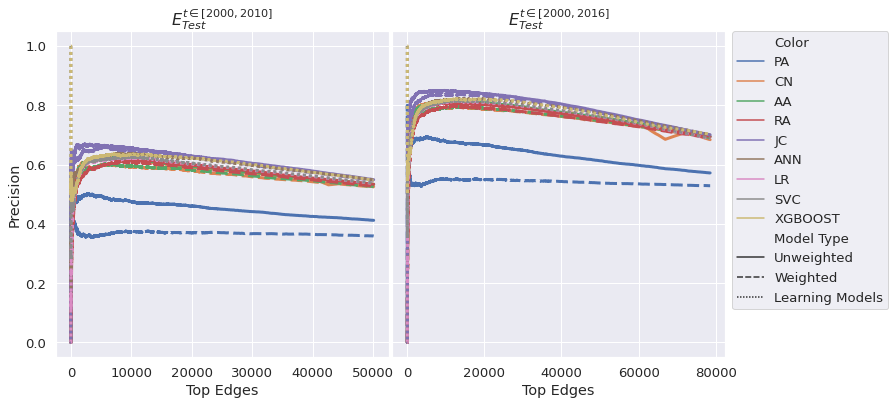

In [ ]:
from matplotlib.pyplot import figure
sns.set(font_scale = 1.2, rc = {'figure.figsize':(12, 6)}, style="darkgrid")

def get_sns_style(x):
  if x in ["ANN", "LR", "XGBOOST", "SVC"]: return "Learning Models"
  elif x in ["JC", "AA", "RA", "CN", "PA"]: return "Unweighted"
  else: return "Weighted"

def get_sns_hue(x):
  if x == "ANN": return "ANN"
  elif x == "LR": return "LR"
  elif x == "XGBOOST": return "XGBOOST"
  elif x == "SVC": return "SVC"
  elif x in ["JC", "WJC"]: return "JC"
  elif x in ["AA", "WAA"]: return "AA"
  elif x in ["PA", "WPA"]: return "PA"
  elif x in ["RA", "WRA"]: return "RA"
  elif x in ["CN", "WCN"]: return "CN"

list_prec_mean = ["ANN", "LR", "XGBOOST", "SVC", "JC", "WJC", "AA", "WAA", "RA", "WRA", "CN", "WCN", "PA", "WPA"]
prec_y_cp_16 = precision_y_metric[precision_y_metric["Year"] == '2016'].copy()
prec_y_cp_16["Model Type"] = prec_y_cp_16.apply(lambda x : get_sns_style(x["Similarity Measure"]), axis = 1)
prec_y_cp_16["Color"] = prec_y_cp_16.apply(lambda x : get_sns_hue(x["Similarity Measure"]), axis = 1)

prec_y_cp_10 = precision_y_metric[precision_y_metric["Year"] == '2010'].copy()
prec_y_cp_10["Model Type"] = prec_y_cp_10.apply(lambda x : get_sns_style(x["Similarity Measure"]), axis = 1)
prec_y_cp_10["Color"] = prec_y_cp_10.apply(lambda x : get_sns_hue(x["Similarity Measure"]), axis = 1)

fig, ax = plt.subplots(1,2, sharex = False, sharey = True)

sns.lineplot(data = prec_y_cp_16, x = "Top Edges",  y = "Precision", hue = "Color", style = "Model Type", ax=ax[1], linewidth = 3)
sns.lineplot(data = prec_y_cp_10, x = "Top Edges",  y = "Precision", hue = "Color", style = "Model Type", ax=ax[0], linewidth = 3)

ax[1].set_title("$E_{Test}^{t \in [2000, 2016]}$", fontsize = 16)
ax[0].set_title("$E_{Test}^{t \in [2000, 2010]}$", fontsize = 16)

ax[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#, prop={'size': 10})
ax[0].get_legend().remove()

plt.subplots_adjust(wspace = .01)
plt.show()

In [ ]:
precision_y_metric.columns = ["Top Edges",	"y",	"Precision",	"Similarity Measure"]

In [ ]:
df_list_to_concat = []

for measure_ in set(precision_y_metric["Similarity Measure"].tolist()):
  for y_ in set(precision_y_metric["y"].tolist()):
    temp = precision_y_metric.query("(`Similarity Measure` == @measure_) and (y == @y_)")
    Q1 = temp[["Precision"]].describe().loc["25%", "Precision"]
    Q3 = temp[["Precision"]].describe().loc["75%", "Precision"]
    IQR = Q3 - Q1
    h_out = Q3 + 1.5 * IQR
    df_list_to_concat.append(temp.query('Precision < @h_out').reset_index(drop = True))

In [ ]:
precision_y_metric.columns = ["Total of Predicted Links",	"y",	"Precision",	"Similarity Measure"]

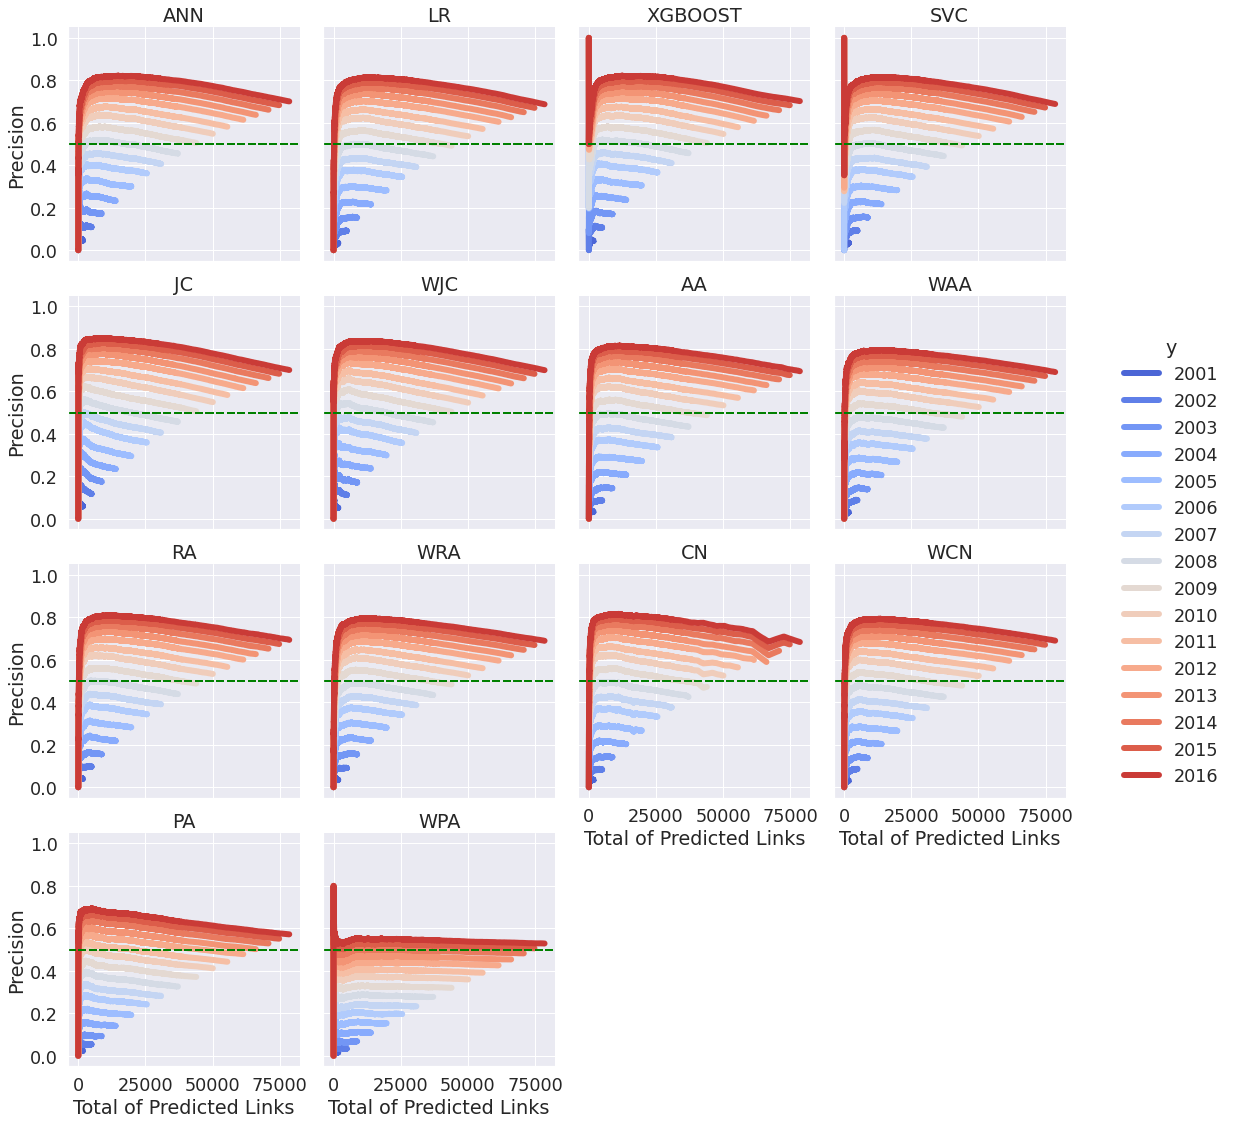

In [ ]:
sns.set(font_scale = 1.6)
g = sns.FacetGrid(precision_y_metric
                  , col = "Similarity Measure", hue = "y"
                  , col_wrap = 4, height = 4, palette = "coolwarm")

g.map(plt.plot, "Total of Predicted Links", "Precision", linewidth = 6)
g.add_legend()
g.map(plt.axhline, y = .5, ls = '--', c = 'green', linewidth = 2)
g.set_titles(col_template = "{col_name}")

g.fig.subplots_adjust(wspace = .1, hspace = .15)

In [ ]:
measure_list = ["PA", "WPA", "CN", "WCN", "AA", "WAA", "RA", "WRA", "JC", "WJC"
                                                   , "ANN", "LR", "SVC", "XGBOOST"]
mean_precision_df = pd.DataFrame(columns = measure_list, index = range(2001, 2017))

for year_ in tqdm(range(2001, 2017)):
    s_year_ = str(year_)
    for measure_ in measure_list:
        prec_list = precision_y_metric.query("""(`Similarity Measure` == @measure_) and (Year == @s_year_)""")
        mean_m = prec_list.Precision.mean()
        mean_precision_df.loc[year_, measure_] = mean_m

100%|██████████| 16/16 [01:37<00:00,  6.10s/it]


In [ ]:
idx_mean_prec = mean_precision_df.mean().reset_index().sort_values(0, ascending = False)["index"].tolist()

In [ ]:
melt_mean_prec = mean_precision_df[idx_mean_prec].reset_index().melt(id_vars = "index")
melt_mean_prec

,index,variable,value
0,2001,JC,0.066734
1,2002,JC,0.136848
2,2003,JC,0.198568
3,2004,JC,0.26173
4,2005,JC,0.326552
...,...,...,...
219,2012,WPA,0.43387
220,2013,WPA,0.461873
221,2014,WPA,0.49231
222,2015,WPA,0.51833


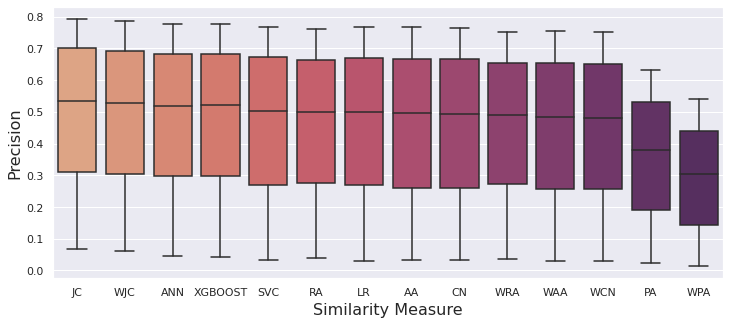

In [ ]:
sns.set(rc = {'figure.figsize':(12, 5)}, style = "darkgrid")
sns.boxplot(data = melt_mean_prec, x = "variable", y = "value", palette = "flare")
plt.xlabel("Similarity Measure", fontsize = 16)
plt.ylabel("Precision", fontsize = 16)
plt.show()

In [ ]:
import seaborn as sns

def all_white(s):

    return ['background-color: white; color : black; font-weight: bolder' for v in s]

s = mean_precision_df[idx_mean_prec].style

for measure_ in mean_precision_df.columns.tolist():
    s = s.format({str(measure_): '{:.3f}'}).bar(subset=[measure_], color='#7dc9ff')

s = s.apply(all_white)

from IPython.display import display

s = s.set_properties(**{
    'text-align': 'center'
    , 'white-space': 'pre-wrap'
    , 'border-style': 'solid'
    , 'border-width': '1px'
    , 'border-color' : 'white'
})

s

,JC,WJC,ANN,XGBOOST,SVC,RA,LR,AA,CN,WRA,WAA,WCN,PA,WPA
2001,0.067,0.060,0.047,0.042,0.033,0.038,0.029,0.033,0.034,0.037,0.029,0.028,0.024,0.014
2002,0.137,0.127,0.111,0.104,0.082,0.093,0.080,0.079,0.080,0.086,0.075,0.074,0.054,0.036
2003,0.199,0.186,0.180,0.172,0.144,0.155,0.142,0.137,0.136,0.148,0.133,0.132,0.094,0.066
2004,0.262,0.251,0.248,0.245,0.217,0.223,0.214,0.208,0.207,0.220,0.206,0.204,0.147,0.108
2005,0.327,0.323,0.315,0.316,0.289,0.291,0.286,0.279,0.277,0.288,0.274,0.272,0.204,0.155
2006,0.397,0.391,0.382,0.385,0.362,0.362,0.359,0.353,0.351,0.354,0.342,0.340,0.259,0.198
2007,0.447,0.443,0.434,0.437,0.414,0.413,0.411,0.406,0.403,0.405,0.394,0.391,0.304,0.236
2008,0.504,0.499,0.490,0.492,0.474,0.471,0.472,0.466,0.463,0.462,0.454,0.452,0.355,0.281
2009,0.563,0.557,0.548,0.549,0.533,0.527,0.530,0.524,0.521,0.518,0.512,0.510,0.403,0.325
2010,0.614,0.607,0.599,0.600,0.586,0.580,0.583,0.580,0.577,0.570,0.565,0.563,0.451,0.368


In [ ]:
def highlight_max(s):

    is_max = s == s.max()
    return ['font-weight: bolder; color: blue' if v else '' for v in is_max]

def highlight_min(s):

    is_min = s == s.min()
    return ['font-weight: bolder; color: red' if v else '' for v in is_min]

s = mean_precision_df[idx_mean_prec].astype("float").describe().transpose().drop("count", axis = 1).style

for measure_ in s.columns.tolist():
    s = s.format({str(measure_): '{:.3f}'})
    
s = s.set_properties(**{
    'text-align': 'center'
    , 'white-space': 'pre-wrap'
    , 'border-style': 'solid'
    , 'border-width': '1px'
    , 'border-color' : 'black'
    , 'color' : 'black'
    , 'background-color' : 'white'
})
s = s.apply(highlight_max).apply(highlight_min)

s

,mean,std,min,25%,50%,75%,max
JC,0.494,0.239,0.067,0.310,0.533,0.700,0.793
WJC,0.486,0.239,0.060,0.305,0.528,0.691,0.785
ANN,0.477,0.240,0.047,0.298,0.519,0.682,0.777
XGBOOST,0.476,0.242,0.042,0.298,0.521,0.682,0.775
SVC,0.460,0.247,0.033,0.271,0.503,0.672,0.768
RA,0.458,0.241,0.038,0.274,0.499,0.664,0.762
LR,0.457,0.247,0.029,0.268,0.501,0.669,0.766
AA,0.454,0.248,0.033,0.261,0.495,0.668,0.767
CN,0.452,0.247,0.034,0.259,0.492,0.666,0.763
WRA,0.450,0.238,0.037,0.271,0.490,0.653,0.751


In [ ]:
from sklearn import metrics

measure_list = ["PA", "WPA", "CN", "WCN", "AA", "WAA", "RA", "WRA", "JC", "WJC"
                                           , "ANN", "LR", "SVC", "XGBOOST"]

ROC_df = pd.DataFrame(columns = ["Similarity Measure", "y", "TPR", "FPR", "AUC"])

for measure_ in tqdm(measure_list):
    for year_  in range(2001, 2017):

        y_true = (df_TEST_2000_2016_MEASURES_999[["year"]] <= year_).astype(int).year.tolist()

        y_pred = df_TEST_2000_2016_MEASURES_999[measure_].tolist()

        FPR, TPR, _ = metrics.roc_curve(y_true, y_pred)
        
        AUC = metrics.auc(FPR, TPR)
        
        ROC_temp_df = pd.DataFrame(columns = ["Similarity Measure", "y", "TPR", "FPR", "AUC"])
        
        ROC_temp_df["TPR"] = TPR
        ROC_temp_df["FPR"] = FPR
        ROC_temp_df["Similarity Measure"] = measure_ 
        ROC_temp_df["y"] = year_
        ROC_temp_df["AUC"] = AUC
        
        ROC_df = pd.concat([ROC_df, ROC_temp_df], ignore_index = True)
    

100%|██████████| 14/14 [00:40<00:00,  2.89s/it]


In [ ]:
ROC_df["Similarity Measure"] = ROC_df["Similarity Measure"].astype("category") 

In [ ]:
ROC_df["Similarity Measure"].cat.reorder_categories(list_prec_mean, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  """Entry point for launching an IPython kernel.


In [ ]:
ROC_df["x_"] = 0
ROC_df["y_"] = 0

In [ ]:
rdn_idx = list()
for measures_ in set(ROC_df["Similarity Measure"].tolist()):
  idx_last = ROC_df[ROC_df["Similarity Measure"] == measures_].tail(1).index.tolist()[0]
  rdn_idx.append(idx_last)

In [ ]:
ROC_df.loc[rdn_idx, "x_"] = 1
ROC_df.loc[rdn_idx, "y_"] = 1

In [ ]:
ROC_df

,Similarity Measure,y,TPR,FPR,AUC,x_,y_
0,PA,2001,0.000000,0.000000,0.584231,0,0
1,PA,2001,0.000000,0.000006,0.584231,0,0
2,PA,2001,0.000000,0.000013,0.584231,0,0
3,PA,2001,0.000000,0.000039,0.584231,0,0
4,PA,2001,0.000000,0.000097,0.584231,0,0
...,...,...,...,...,...,...,...
6526080,XGBOOST,2016,0.999987,0.999173,0.756449,0,0
6526081,XGBOOST,2016,0.999987,0.999695,0.756449,0,0
6526082,XGBOOST,2016,0.999987,0.999733,0.756449,0,0
6526083,XGBOOST,2016,0.999987,0.999758,0.756449,0,0


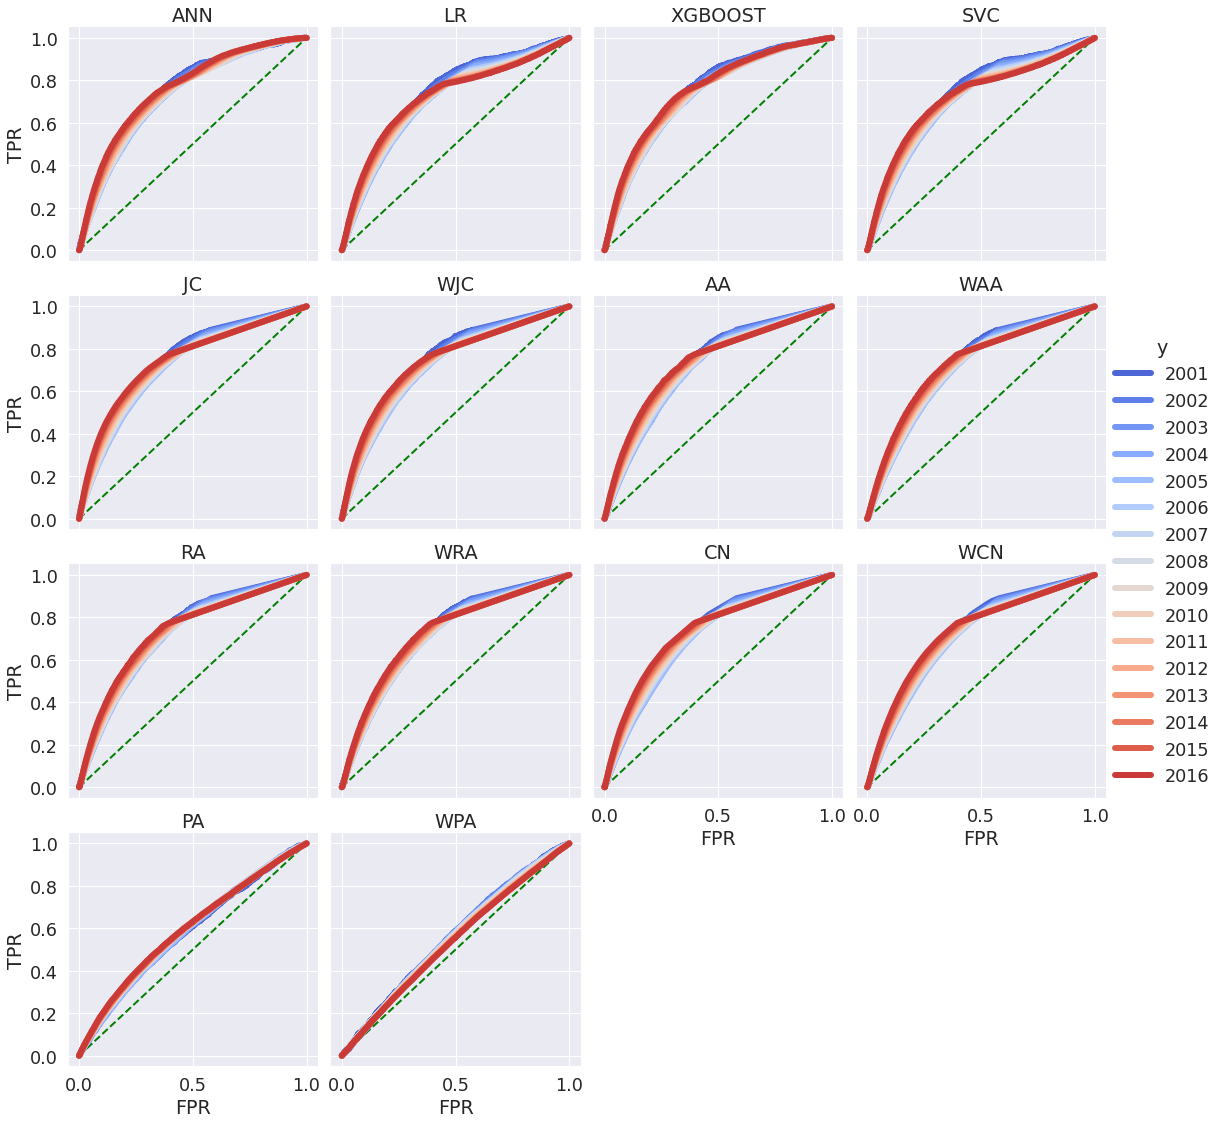

In [ ]:
import seaborn as sns
sns.set(font_scale=1.6)
g = sns.FacetGrid(ROC_df, col = "Similarity Measure", hue = "y", col_wrap = 4, height = 4, palette = "coolwarm")

g.map(plt.plot, "x_", "y_", linestyle = '--', color = 'green', linewidth = 2)
g.map(plt.plot, "FPR", "TPR", linewidth = 6)
g.add_legend()

g.set_titles(col_template = "{col_name}")

g.fig.subplots_adjust(wspace = .05, hspace=.15)

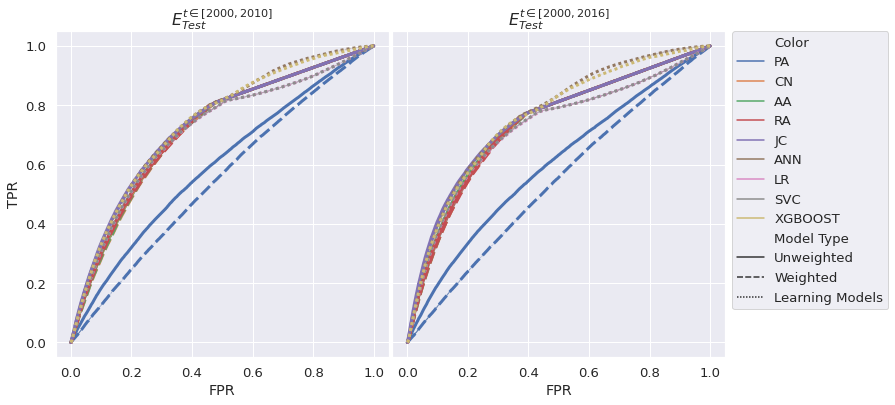

In [ ]:
from matplotlib.pyplot import figure
sns.set(font_scale = 1.2, rc = {'figure.figsize':(12, 6)}, style="darkgrid")

def get_sns_style(x):
  if x in ["ANN", "LR", "XGBOOST", "SVC"]: return "Learning Models"
  elif x in ["JC", "AA", "RA", "CN", "PA"]: return "Unweighted"
  else: return "Weighted"

def get_sns_hue(x):
  if x == "ANN": return "ANN"
  elif x == "LR": return "LR"
  elif x == "XGBOOST": return "XGBOOST"
  elif x == "SVC": return "SVC"
  elif x in ["JC", "WJC"]: return "JC"
  elif x in ["AA", "WAA"]: return "AA"
  elif x in ["PA", "WPA"]: return "PA"
  elif x in ["RA", "WRA"]: return "RA"
  elif x in ["CN", "WCN"]: return "CN"

list_rec_mean = ["ANN", "LR", "XGBOOST", "SVC", "JC", "WJC", "AA", "WAA", "RA", "WRA", "CN", "WCN", "PA", "WPA"]
auc_y_cp_16 = ROC_df[ROC_df["Year"] == 2016].copy()
auc_y_cp_16["Model Type"] = auc_y_cp_16.apply(lambda x : get_sns_style(x["Similarity Measure"]), axis = 1)
auc_y_cp_16["Color"] = auc_y_cp_16.apply(lambda x : get_sns_hue(x["Similarity Measure"]), axis = 1)

auc_y_cp_10 = ROC_df[ROC_df["Year"] == 2010].copy()
auc_y_cp_10["Model Type"] = auc_y_cp_10.apply(lambda x : get_sns_style(x["Similarity Measure"]), axis = 1)
auc_y_cp_10["Color"] = auc_y_cp_10.apply(lambda x : get_sns_hue(x["Similarity Measure"]), axis = 1)

fig, ax = plt.subplots(1,2, sharex = False, sharey = True)

sns.lineplot(data = auc_y_cp_16, x = "FPR",  y = "TPR", hue = "Color", style = "Model Type", ax = ax[1], linewidth = 3)
sns.lineplot(data = auc_y_cp_10, x = "FPR",  y = "TPR", hue = "Color", style = "Model Type", ax = ax[0], linewidth = 3)

ax[1].set_title("$E_{Test}^{t \in [2000, 2016]}$", fontsize = 16)
ax[0].set_title("$E_{Test}^{t \in [2000, 2010]}$", fontsize = 16)

ax[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax[0].get_legend().remove()

plt.subplots_adjust(wspace = .01)
plt.show()

In [ ]:
df_prec_t_edges_list = []
for n_edge in [2000, 10000, 20000, 30000, 60000, 78569]:
  top_edges_df = precision_y_metric[precision_y_metric["Top Edges"] == n_edge]
  top_edges_df = top_edges_df.query("Year == '2016'")[["Precision", "Similarity Measure"]].copy()
  top_edges_df.columns = ["Precision "+str(n_edge), "Similarity Measure"]
  df_prec_t_edges_list.append(top_edges_df.set_index("Similarity Measure"))

In [ ]:
from functools import reduce
df_prec_edges = reduce(lambda  left,right: pd.merge(left,right,on=['Similarity Measure']), df_prec_t_edges_list)

In [ ]:
idx_prec_top = df_prec_edges.mean(axis = 1).reset_index().sort_values(0, ascending = False)["Similarity Measure"].tolist()

In [ ]:
tempcp = df_prec_edges.loc[idx_prec_top].round(3).reset_index(drop = False).copy()
string_latex = ""
for i in range(0, tempcp.shape[0]):
  string_row = "{{" + str(tempcp.iloc[i, 0]) + "}} "
  for j in range(1, tempcp.shape[1]):
    string_row += " & " + str(tempcp.iloc[i, j])

  string_row += " \\\\ \n" 
  string_latex += string_row

print(string_latex)

{{JC}}  & 0.831 & 0.849 & 0.839 & 0.824 & 0.75 & 0.7 \\ 
{{WJC}}  & 0.804 & 0.835 & 0.832 & 0.816 & 0.749 & 0.7 \\ 
{{ANN}}  & 0.752 & 0.818 & 0.821 & 0.808 & 0.748 & 0.701 \\ 
{{XGBOOST}}  & 0.754 & 0.818 & 0.82 & 0.81 & 0.742 & 0.702 \\ 
{{AA}}  & 0.778 & 0.813 & 0.808 & 0.795 & 0.738 & 0.695 \\ 
{{CN}}  & 0.786 & 0.814 & 0.805 & 0.791 & 0.736 & 0.684 \\ 
{{SVC}}  & 0.759 & 0.812 & 0.812 & 0.799 & 0.74 & 0.689 \\ 
{{LR}}  & 0.756 & 0.811 & 0.81 & 0.798 & 0.738 & 0.687 \\ 
{{RA}}  & 0.76 & 0.807 & 0.803 & 0.791 & 0.732 & 0.694 \\ 
{{WAA}}  & 0.741 & 0.791 & 0.789 & 0.778 & 0.729 & 0.691 \\ 
{{WCN}}  & 0.743 & 0.791 & 0.787 & 0.776 & 0.729 & 0.69 \\ 
{{WRA}}  & 0.733 & 0.794 & 0.789 & 0.779 & 0.728 & 0.69 \\ 
{{PA}}  & 0.684 & 0.678 & 0.666 & 0.648 & 0.598 & 0.572 \\ 
{{WPA}}  & 0.534 & 0.551 & 0.549 & 0.546 & 0.535 & 0.529 \\ 



In [ ]:
tempcp.reset_index(drop = False).iloc[0, 0]

'JC'

In [ ]:
def highlight_max(s):

    is_max = s == s.max()
    return ['font-weight: bolder; color: blue' if v else '' for v in is_max]

def highlight_min(s):

    is_min = s == s.min()
    return ['font-weight: bolder; color: red' if v else '' for v in is_min]

s = df_prec_edges.loc[idx_prec_top].style#.astype("float").describe().transpose().drop("count", axis = 1).style

for measure_ in s.columns.tolist():
    s = s.format({str(measure_): '{:.3f}'})
    
s = s.set_properties(**{
    'text-align': 'center'
    , 'white-space': 'pre-wrap'
    , 'border-style': 'solid'
    , 'border-width': '1px'
    , 'border-color' : 'black'
    , 'color' : 'black'
    , 'background-color' : 'white'
})
s = s.apply(highlight_max).apply(highlight_min)
# save_img(s, "precision_top_edges.png")
s

,Precision 2000,Precision 10000,Precision 20000,Precision 30000,Precision 60000,Precision 78569
Similarity Measure,,,,,,
JC,0.8310000000,0.8489000000,0.8388000000,0.8240333333,0.7503833333,0.700
WJC,0.8040000000,0.8346000000,0.8324000000,0.8164666667,0.7492666667,0.700
ANN,0.7525000000,0.8181000000,0.8207500000,0.8083333333,0.7481666667,0.701
XGBOOST,0.7535000000,0.8178000000,0.8198000000,0.8100666667,0.7425000000,0.702
AA,0.7785000000,0.8133000000,0.8080000000,0.7950666667,0.7381666667,0.695
CN,0.7855000000,0.8144000000,0.8050500000,0.7914333333,0.7364000000,0.684
SVC,0.7590000000,0.8124000000,0.8116500000,0.7991000000,0.7395666667,0.689
LR,0.7565000000,0.8109000000,0.8099500000,0.7975333333,0.7383000000,0.687
RA,0.7605000000,0.8072000000,0.8025500000,0.7911666667,0.7320000000,0.694


In [ ]:
(df_TEST_2000_2016_MEASURES_999[["year"]] <= 2001).astype(int).sum().year

1766

In [ ]:
measure_list = ["PA", "WPA", "CN", "WCN", "AA", "WAA", "RA", "WRA", "JC", "WJC"
               , "ANN", "LR", "SVC", "XGBOOST"]

recall_performance_list = []
n_2016 = (df_TEST_2000_2016_MEASURES_999[["year"]] <= 2016).astype(int).sum().year

for measure_ in measure_list:
    recall_df = pd.DataFrame(index = range(1, 1+n_2016))
    for year_  in tqdm(range(2001, 2017)):
        
        n_year = (df_TEST_2000_2016_MEASURES_999[["year"]] <= year_).astype(int).sum().year

        sorted_df = df_TEST_2000_2016_MEASURES_999.sort_values(measure_ , ascending = False
                                                          , ignore_index = True).head(n_year)
        y_true = (sorted_df[["year"]] <= year_).astype(int).year.tolist()

        performance_list = []
        for i in range(len(y_true)):
            recall_df.loc[(i + 1), str(year_)] = sum(y_true[:(i + 1)]) / n_year
    
    recall_performance_list.append(recall_df)

100%|██████████| 16/16 [11:09<00:00, 41.85s/it]


In [ ]:
recall_y_metric = pd.DataFrame(columns = ["Edges", "Year", "Recall", "Similarity Measure"])
for i, measure_ in enumerate(measure_list):
    measure_df = recall_performance_list[i].reset_index()
    melt_recall_df = measure_df.melt(id_vars = "index")
    melt_recall_df.columns = ["Edges", "Year", "Recall"]
    melt_recall_df["Similarity Measure"] = measure_
    
    recall_y_metric = pd.concat([recall_y_metric, melt_recall_df], ignore_index = True)

In [ ]:
recall_y_metric

,Edges,Year,Recall,Similarity Measure
0,1,2001,0.000000,PA
1,2,2001,0.000000,PA
2,3,2001,0.000000,PA
3,4,2001,0.000000,PA
4,5,2001,0.000000,PA
...,...,...,...,...
17599451,78565,2016,0.702160,XGBOOST
17599452,78566,2016,0.702173,XGBOOST
17599453,78567,2016,0.702173,XGBOOST
17599454,78568,2016,0.702185,XGBOOST


In [ ]:
recall_y_metric["Similarity Measure"] = recall_y_metric["Similarity Measure"].astype('category')
list_prec_mean = ["ANN", "LR", "XGBOOST", "SVC", "JC", "WJC", "AA", "WAA", "RA", "WRA", "CN", "WCN", "PA", "WPA"]
recall_y_metric["Similarity Measure"].cat.reorder_categories(list_prec_mean, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
recall_y_metric.columns = ["Top Edges", "Year", "Recall", "Similarity Measure"]

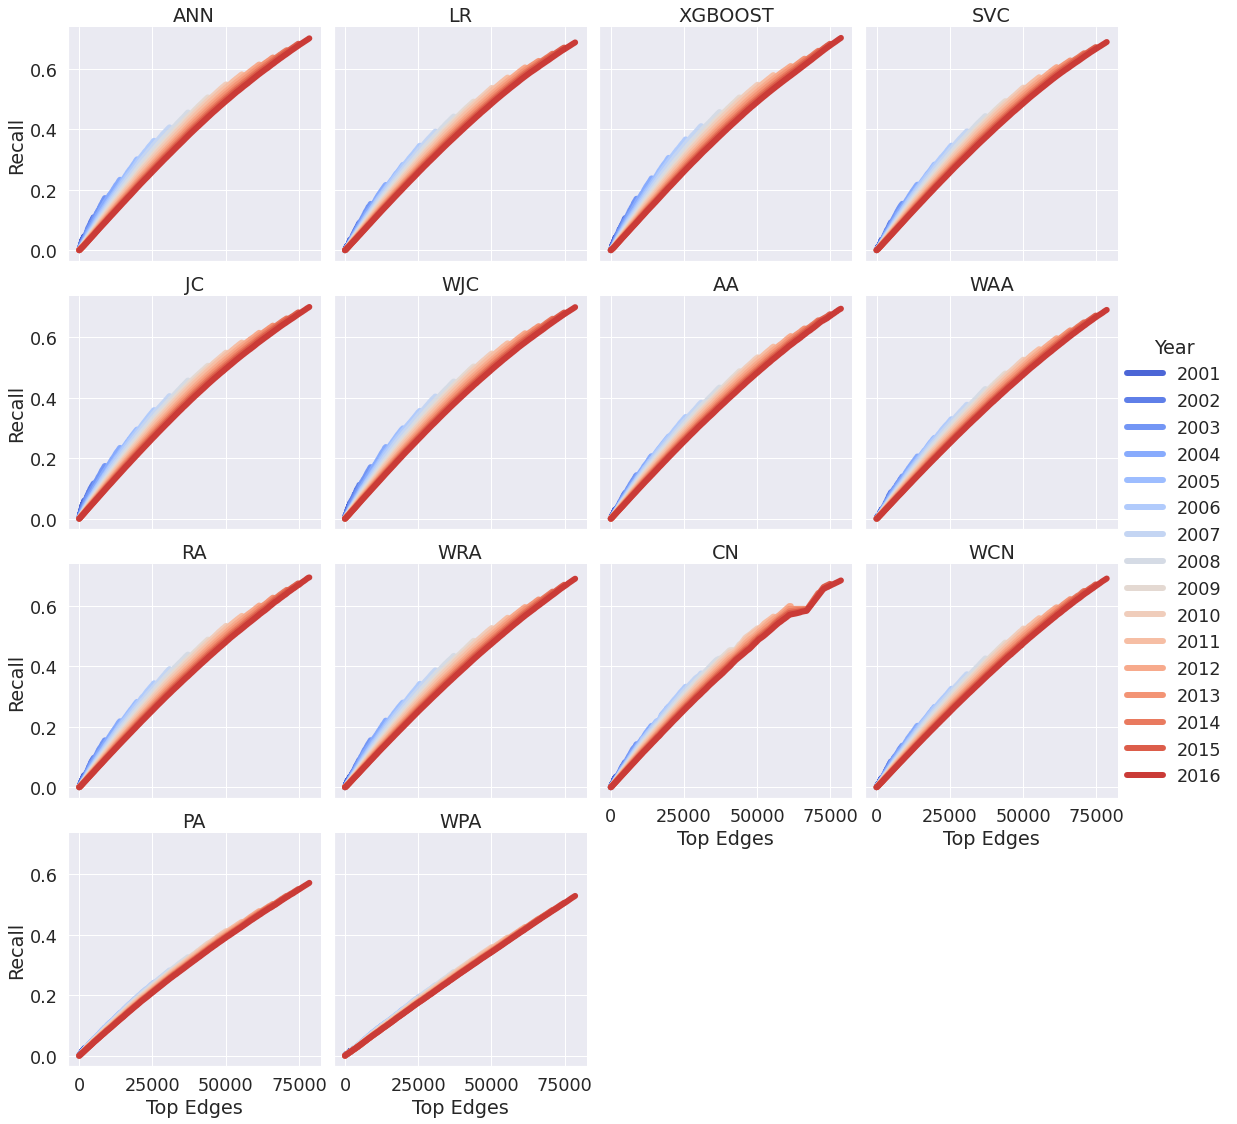

In [ ]:
sns.set(font_scale=1.6)
g = sns.FacetGrid(recall_y_metric, col = "Similarity Measure", hue="Year", col_wrap = 4, height = 4, palette = "coolwarm")

# g.map(plt.plot, "x", "y", linestyle = '--', color = 'yellow', linewidth = 2)
g.map(plt.plot, "Top Edges", "Recall", linewidth = 6)
g.add_legend()

g.set_titles(col_template = "{col_name}")

g.fig.subplots_adjust(wspace = .05, hspace=.15)

In [ ]:
df_rec_t_edges_list = []
for n_edge in [2000, 10000, 20000, 30000, 60000, 78569]:
  top_edges_df = recall_y_metric[recall_y_metric["Top Edges"] == n_edge]
  top_edges_df = top_edges_df.query("Year == '2016'")[["Recall", "Similarity Measure"]].copy()
  top_edges_df.columns = ["Recall "+str(n_edge), "Similarity Measure"]
  df_rec_t_edges_list.append(top_edges_df.set_index("Similarity Measure"))

from functools import reduce
df_rec_edges = reduce(lambda  left,right: pd.merge(left,right,on=['Similarity Measure']), df_rec_t_edges_list)

idx_rec_top = df_rec_edges.mean(axis = 1).reset_index().sort_values(0, ascending = False)["Similarity Measure"].tolist()

tempcp = df_rec_edges.loc[idx_rec_top].round(3).reset_index(drop = False).copy()
string_latex = ""
for i in range(0, tempcp.shape[0]):
  string_row = "{{" + str(tempcp.iloc[i, 0]) + "}} "
  for j in range(1, tempcp.shape[1]):
    string_row += " & " + str(tempcp.iloc[i, j])

  string_row += " \\\\ \n" 
  string_latex += string_row

print(string_latex)

{{JC}}  & 0.021 & 0.108 & 0.214 & 0.315 & 0.573 & 0.7 \\ 
{{WJC}}  & 0.02 & 0.106 & 0.212 & 0.312 & 0.572 & 0.7 \\ 
{{ANN}}  & 0.019 & 0.104 & 0.209 & 0.309 & 0.571 & 0.701 \\ 
{{XGBOOST}}  & 0.019 & 0.104 & 0.209 & 0.309 & 0.567 & 0.702 \\ 
{{AA}}  & 0.02 & 0.104 & 0.206 & 0.304 & 0.564 & 0.695 \\ 
{{SVC}}  & 0.019 & 0.103 & 0.207 & 0.305 & 0.565 & 0.689 \\ 
{{LR}}  & 0.019 & 0.103 & 0.206 & 0.305 & 0.564 & 0.687 \\ 
{{RA}}  & 0.019 & 0.103 & 0.204 & 0.302 & 0.559 & 0.694 \\ 
{{CN}}  & 0.02 & 0.104 & 0.205 & 0.302 & 0.562 & 0.684 \\ 
{{WAA}}  & 0.019 & 0.101 & 0.201 & 0.297 & 0.557 & 0.691 \\ 
{{WRA}}  & 0.019 & 0.101 & 0.201 & 0.297 & 0.556 & 0.69 \\ 
{{WCN}}  & 0.019 & 0.101 & 0.2 & 0.296 & 0.557 & 0.69 \\ 
{{PA}}  & 0.017 & 0.086 & 0.17 & 0.247 & 0.456 & 0.572 \\ 
{{WPA}}  & 0.014 & 0.07 & 0.14 & 0.208 & 0.408 & 0.529 \\ 

